# Exercise D: linear mixed model

## Part 2: Binary traits

**Charcot-Marie-Tooth Disease (CMT)** is a group of inherited peripheral neuropathies characterized by progressive muscle weakness, atrophy, and sensory loss, primarily in the distal limbs. It is one of the most common inherited neurological disorders, affecting approximately 1 in 2,500 people. Symptoms often begin in adolescence or early adulthood and may include foot deformities, gait abnormalities, and reduced reflexes.

Below you will apply a method called [regenie](https://rgcgithub.github.io/regenie/) that implemented linear mixed model for GWAS.



In [7]:
# create the output folder for storing output files
if [ ! -d ./output ]; then
  mkdir ./output
fi

## Step0: Format the data as needed


In [2]:
head /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt

FID IID phenotype
1000022	1000022	0
1000035	1000035	0
1000046	1000046	0
1000054	1000054	0
1000063	1000063	0
1000078	1000078	0
1000105	1000105	0
1000141	1000141	0
1000164	1000164	0



## Step1: fitting the null linear mixed model with regenie

For quantitative traits (such as standing height), regenie fits a linear mixed model by default.  
It is recommended to inverse normalize the phenotype before analysis to improve normality and statistical power.

In [ ]:
# # do not run!
# # running about 2.5 hours
# source /home/student/miniconda3/bin/activate regenie_env
# regenie \
#   --step 1 \
#   --bed /home/student/USER/GWAS/data/ukb23150_c1_c22_2024_WES_1826_QCpruned \
#   --phenoFile /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt \
#   --bt \
#   --strict \
#   --firth --approx \
#   --bsize 1000 \
#   --loocv \
#   --lowmem \
#   --lowmem-prefix ./output/regenie_tmp_preds_WES \
#   --write-null-firth \
#   --out ./output/regenie_step1_WO_PC20_WES
# conda deactivate

In [ ]:
# files .loco is the output with the per-chromosome LOCO predictions as rows of the files
head -n 22 /home/student/USER/GWAS/data/regenie_step1_WES_1.loco |
  awk '{print $1,$2,$3,$4,$5,$6,$7,$8,$9}' | column -t

See more parameter explanations: https://rgcgithub.github.io/regenie/options/.

The estimates for approximate Firth under the null will be written to file .firth and the list of these files is written to file_firth.list. This can be used in step 2 as --use-null-firth file_firth.list.

In [4]:
cat /home/student/USER/GWAS/data/regenie_step1_WES_1.firth

1 -112.731
2 -112.474
3 -112.817
4 -113.042
5 -112.696
6 -113.191
7 -113.136
8 -113.058
9 -113.423
10 -113.426
11 -112.942
12 -112.698
13 -113.495
14 -113.547
15 -113.537
16 -113.307
17 -112.475
18 -113.726
19 -112.309
20 -113.734
21 -113.782
22 -113.115
23 -113.817



## Step 2: performing single-variant association tests

For quantitative traits (such as standing height), regenie automatically uses a linear mixed model for association testing.

There is no need for saddle point approximation or Firth correction, as these are specific to binary traits.

The output will include effect sizes, standard errors, and p-values for each variant.

In [5]:
# running about 0.5 minutes
source /home/student/miniconda3/bin/activate regenie_env
regenie \
  --step 2 \
  --bed /home/student/USER/GWAS/data/ukb23150_c1_c22_2024_WES_1826_QCpruned \
  --ref-first \
  --phenoFile /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt \
  --bt \
  --strict \
  --bsize 1000 \
  --firth --approx \
  --pThresh 0.01 \
  --pred /home/student/USER/GWAS/data/regenie_step1_WES_pred.list \
  --use-null-firth /home/student/USER/GWAS/data/regenie_step1_WES_firth.list \
  --out ./output/regenie_step2_asso_WES
conda deactivate

(regenie_env) Start time: Tue Jul 22 22:19:30 2025

              |===========================|
              |      REGENIE v4.1.gz      |
              |===========================|

Copyright (c) 2020-2024 Joelle Mbatchou, Andrey Ziyatdinov and Jonathan Marchini.
Distributed under the MIT License.
Compiled with Boost Iostream library.
Using Intel MKL with Eigen.

Log of output saved in file : ./output/regenie_step2_asso_WES.log

Options in effect:
  --step 2 \
  --bed /home/student/USER/GWAS/data/ukb23150_c1_c22_2024_WES_1826_QCpruned \
  --ref-first \
  --phenoFile /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt \
  --bt \
  --strict \
  --bsize 1000 \
  --firth \
  --approx \
  --pThresh 0.01 \
  --pred /home/student/USER/GWAS/data/regenie_step1_WES_pred.list \
  --use-null-firth /home/student/USER/GWAS/data/regenie_step1_WES_firth.list \
  --out ./output/regenie_step2_asso_WES

Association testing mode with fast multithreading using OpenMP
 * bim              : [/h

### View the result of REGENIE-GWAS


In [6]:
head ./output/regenie_step2_asso_WES_phenotype.regenie | column -t

CHROM  GENPOS  ID                ALLELE0  ALLELE1  A1FREQ    N     TEST  BETA        SE        CHISQ      LOG10P     EXTRA
1      931131  1:931131:C:CCCCT  C        CCCCT    0.749304  1795  ADD   0.0879027   0.143134  0.377154   0.268306   NA
1      935954  1:935954:G:T      G        T        0.713151  1825  ADD   -0.0556126  0.132389  0.176459   0.171061   NA
1      941119  1:941119:A:G      A        G        0.9477    1826  ADD   0.0558923   0.283422  0.0388898  0.0738289  NA
1      942335  1:942335:C:G      C        G        0.936534  1812  ADD   0.0583145   0.255568  0.0520641  0.0864458  NA
1      942934  1:942934:G:C      C        G        0.902793  1826  ADD   -0.223612   0.201524  1.23123    0.573215   NA
1      942951  1:942951:C:T      T        C        0.978094  1826  ADD   0.489697    0.405544  1.45807    0.643521   NA
1      943404  1:943404:C:G      G        C        0.987678  1826  ADD   0.415825    0.487273  0.728243   0.405107   NA
1      943429  1:943429:C:T      T   

In [7]:
# search for the most significant SNP
awk 'NR>1 {print $1,$2,$3,$12}' \
  ./output/regenie_step2_asso_WES_phenotype.regenie | sort -k4,4gr 2>/dev/null | head -1 || true

4 70244771 4:70244771:C:T 6.46158



In [8]:
# Prepare for plotting the results
options(warn = -1)
suppressPackageStartupMessages({
  library(magrittr)
})
regenie_results= data.table::fread("./output/regenie_step2_asso_WES_phenotype.regenie")
regenie_results[, P := 10^(-LOG10P)] %>%
    data.table::setnames(
        c("CHROM", "GENPOS", "ID"),
        c("CHR", "BP", "SNP")
    )
regenie_results %>%
    data.table::fwrite("./output/regenie_step2_asso_WES_phenotype_v2.regenie")

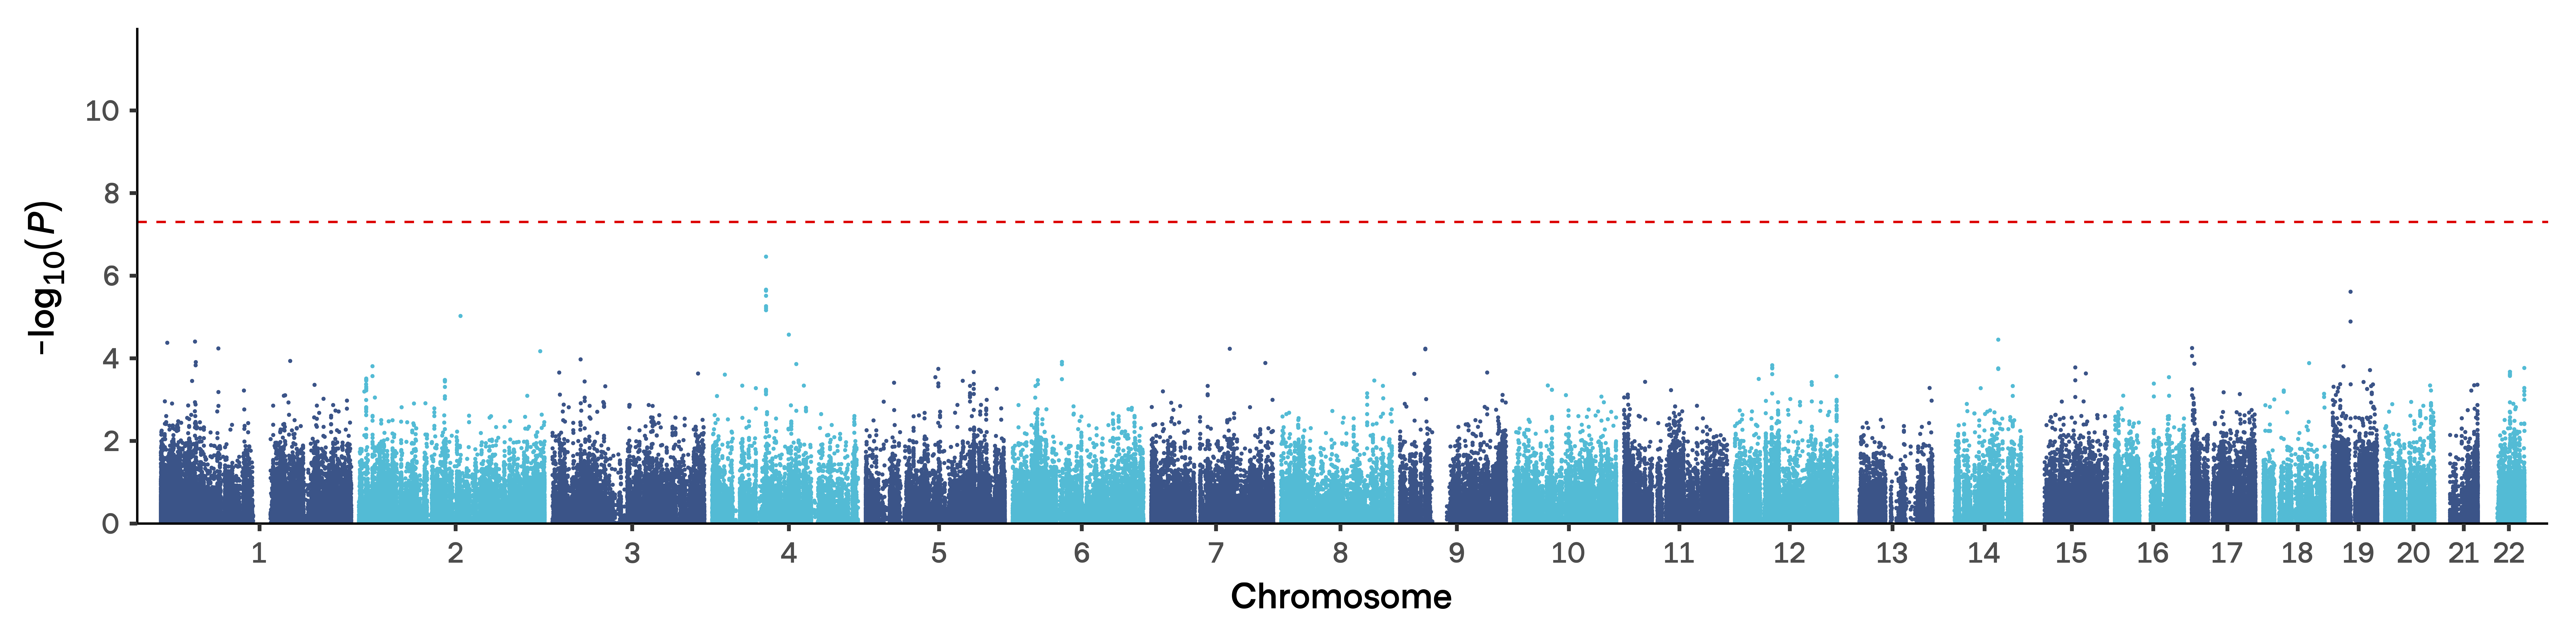

In [9]:
# running about 0.5 minutes
options(repr.plot.width = 16,
        repr.plot.height = 4,
        repr.plot.res = 600)
source("/home/student/USER/GWAS/data/plotPlink.R")

# plot the results (.regenie is the output file from regenie)
plots= plot_qqman(
  plink_assoc_file= "./output/regenie_step2_asso_WES_phenotype_v2.regenie",
  pheno_name= "CMT",
  save_plot = FALSE,
  lambda1_qq_pos = c(1.48, -5.5),
  lambda2_qq_pos = c(1.1, -4)
)
print(plots$manhattan_plot)

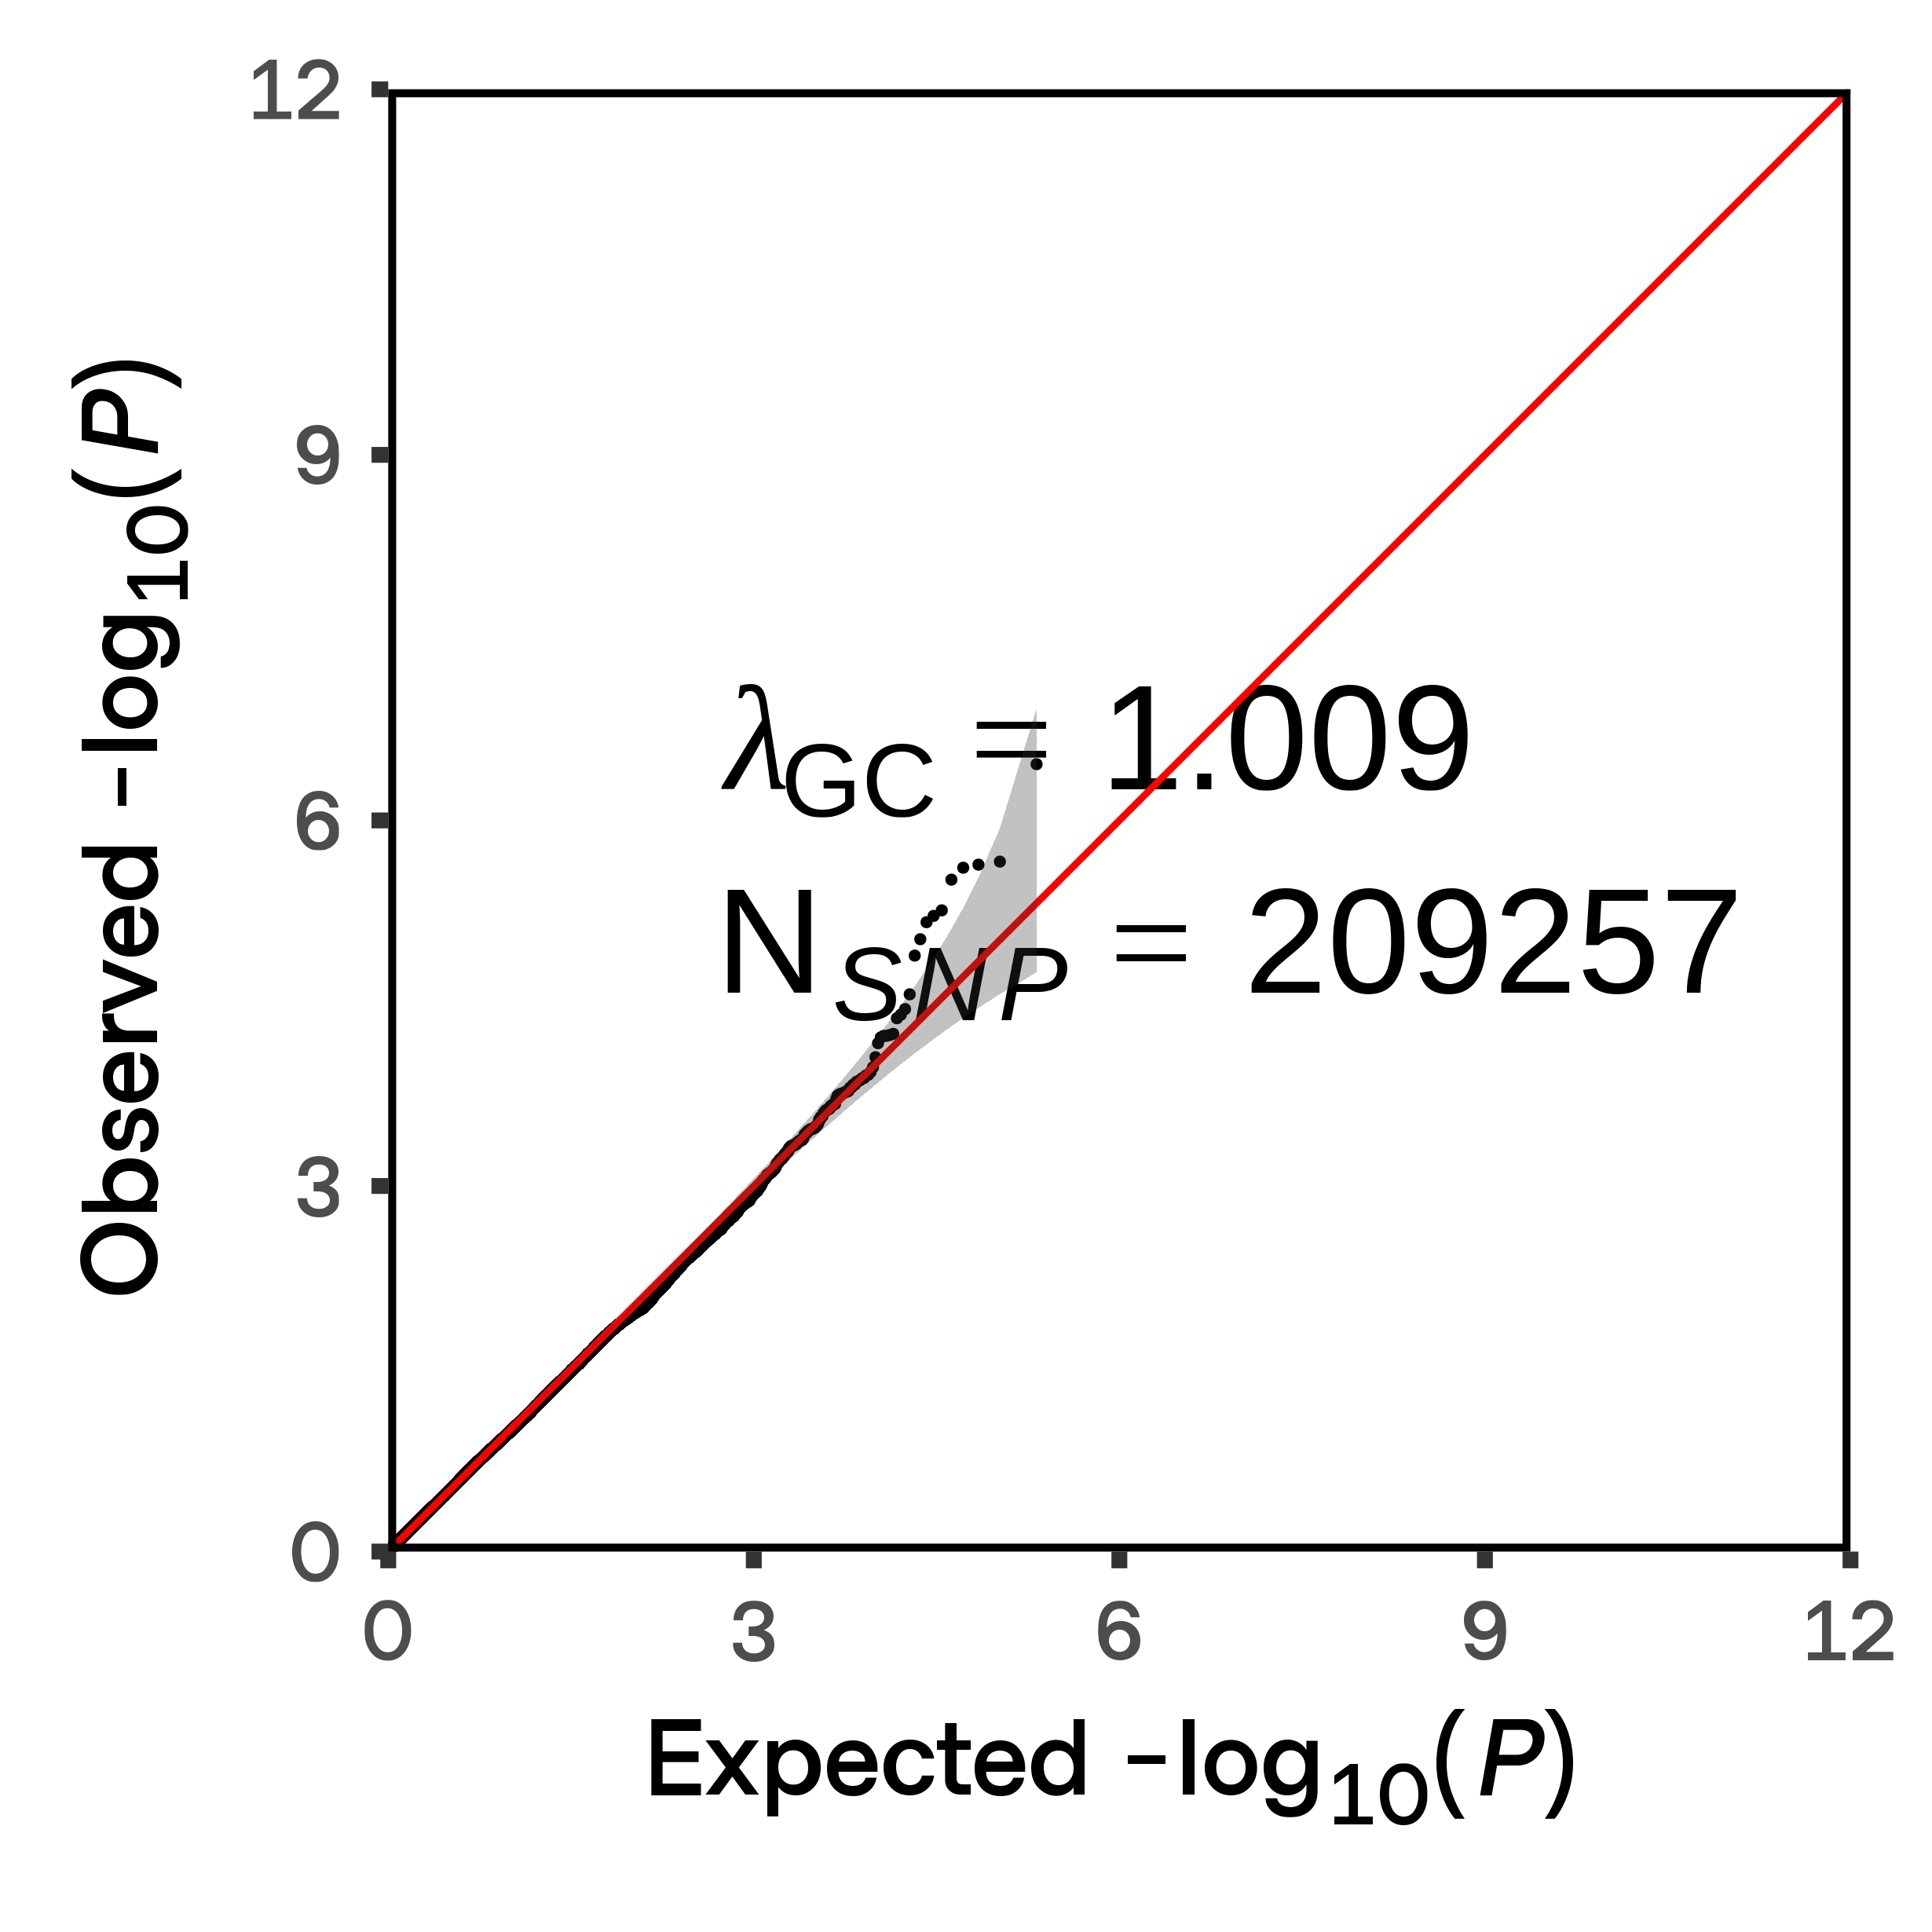

In [10]:
# running about 0.5 minutes
options(repr.plot.width = 4.1,
        repr.plot.height = 4.1,
        repr.plot.res = 600)
print(plots$qq_plot)

# Exercise E : Gene-based testing

Instead of performing single-variant association tests, multiple variants can be aggregated in a given region, such as a gene.

This can be especially helpful when testing **rare variants** as single-vatiant tests usuaally have lower power performance.

To avoid inflation in the gene-based tets due to rare variants as well as reduce computation time, we can implement the collapsing approach of gene-based testing proposed in SAIGE-GENE+, where ultra-rare variants are aggregated into a mask.

### Annotation input files: to define variant sets and functional annotations which will be used to generate masks.

Each line contains the variant name, the set/gene name and a single annotation category (space/tab separated).

Variants not in this file will be assigned to a default "NULL" category. A maximum of 63 annotation categories (+NULL category) is allowed.

To obtain a single annotation per gene, we could choose the most deleterious functional annotation across the gene transcripts or alternatively use the canonical transcript (note that its definition can vary across software).

In [11]:
head /home/student/USER/GWAS/data/regenie_WES_anno_file.txt | column -t

22:15528067:C:T  OR11H1  MODIFIER
22:15528094:A:G  OR11H1  MODIFIER
22:15528096:G:A  OR11H1  MODIFIER
22:15528109:T:G  OR11H1  MODIFIER
22:15528133:A:G  OR11H1  MODIFIER
22:15528155:G:A  OR11H1  MODIFIER
22:15528165:C:A  OR11H1  MODIFIER
22:15528166:C:T  OR11H1  MODIFIER
22:15528177:C:T  OR11H1  MODIFIER
22:15528179:G:T  OR11H1  MODIFIER



### Set list file: to list variants within each set/gene to use when building masks.

Each line contains the set/gene name followed by a chromosome and physical position for the set/gene, then by a comma-separated list of variants included in the set/gene.


In [12]:
head -n 1 /home/student/USER/GWAS/data/regenie_WES_set_list_CHR_POS.txt | column -t

A4GALT  22  42692793  22:42692793:C:G,22:42692793:C:T,22:42692794:G:A,22:42692794:G:C,22:42692795:G:A,22:42692808:C:G,22:42692808:C:T,22:42692809:G:A,22:42692810:G:A,22:42692822:T:C,22:42692822:T:G,22:42692826:T:A,22:42692827:C:T,22:42692828:C:T,22:42692830:C:G,22:42692830:C:T,22:42692831:G:A,22:42692835:A:T,22:42692837:G:A,22:42692838:G:A,22:42692839:C:T,22:42692840:G:A,22:42692841:G:A,22:42692841:GC:G,22:42692843:C:A,22:42692847:T:G,22:42692849:C:T,22:42692850:C:T,22:42692854:T:G,22:42692857:G:C,22:42692858:G:A,22:42692860:G:A,22:42692866:T:G,22:42692872:G:A,22:42692879:T:C,22:42692879:T:G,22:42692881:G:A,22:42692882:C:T,22:42692883:G:A,22:42692884:G:A,22:42692886:C:T,22:42692888:C:T,22:42692891:C:T,22:42692896:G:A,22:42692899:C:T,22:42692900:A:C,22:42692903:T:G,22:42692905:C:T,22:42692906:A:G,22:42692907:T:C,22:42692911:C:T,22:42692913:C:G,22:42692913:C:T,22:42692914:G:A,22:42692917:C:A,22:42692917:C:T,22:42692918:G:A,22:42692918:G:C,22:42692920:C:T,22:42692921:G:T,22:42692924:G:A,2

### Mask file

This file specifies which annotation categories should be combined into masks.

Each line contains a mask name followed by a comma-separated list of categories included in the mask (i.e. union is taken over categories).

In [13]:
head /home/student/USER/GWAS/data/regenie_WES_mask_file.txt | column -t

HIGH      HIGH
LOW       LOW
MODERATE  MODERATE
MODIFIER  MODIFIER



### Checking input files

To assess the concordance between the input files for building masks, we can use **--check-burden-files** which will generate a report in **file_masks_report.txt** containing:

- for each set, the list the variants in the set-list file which are unrecognized (not genotyped or not present in annotation file for the set)

- for each mask, the list of annotations in the mask definition file which are not in the annotation file

Additionally, we can use **--strict-check-burden** to enforce full agreement between the three files (if not, program will terminate) :

- all genotyped variants in the set list file must be in the annotation file (for the corresponding set)

- all annotations in the mask definition file must be present in the annotation file

In [2]:
source /home/student/miniconda3/bin/activate regenie_env
regenie \
  --step 2 \
  --bed /home/student/USER/GWAS/data/ukb23150_c22_2024_WES_1826 \
  --ref-first \
  --chr 22 \
  --phenoFile /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt \
  --bt \
  --strict \
  --firth --approx \
  --bsize 1000 \
  --pred /home/student/USER/GWAS/data/regenie_step1_WES_pred.list \
  --check-burden-files \
  --anno-file /home/student/USER/GWAS/data/regenie_WES_anno_file.txt \
  --set-list /home/student/USER/GWAS/data/regenie_WES_set_list_CHR_POS.txt \
  --mask-def /home/student/USER/GWAS/data/regenie_WES_mask_file.txt \
  --skip-test \
  --strict-check-burden \
  --out ./output/burden_check_WES
conda deactivate

(regenie_env) Start time: Tue Jul 22 23:03:05 2025

              |===========================|
              |      REGENIE v4.1.gz      |
              |===========================|

Copyright (c) 2020-2024 Joelle Mbatchou, Andrey Ziyatdinov and Jonathan Marchini.
Distributed under the MIT License.
Compiled with Boost Iostream library.
Using Intel MKL with Eigen.

Log of output saved in file : ./output/burden_check_WES.log

Options in effect:
  --step 2 \
  --bed /home/student/USER/GWAS/data/ukb23150_c22_2024_WES_1826 \
  --ref-first \
  --chr 22 \
  --phenoFile /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt \
  --bt \
  --strict \
  --firth \
  --approx \
  --bsize 1000 \
  --pred /home/student/USER/GWAS/data/regenie_step1_WES_pred.list \
  --check-burden-files \
  --anno-file /home/student/USER/GWAS/data/regenie_WES_anno_file.txt \
  --set-list /home/student/USER/GWAS/data/regenie_WES_set_list_CHR_POS.txt \
  --mask-def /home/student/USER/GWAS/data/regenie_WES_mask_

### AAF file

Both functional annotations and alternative allele frequency (AAF) cutoffs are used when building masks (e.g. only considering LoF sites where AAF is below 1%).

By default, the AAF for each variant is computed from the sample but alternatively, the user can specify variant AAFs using this file.

### AAF cutoffs

Option **--aaf-bins** specifies the AAF upper bounds used to generate burden masks (AAF and not MAF [minor allele frequency] is used when deciding which variants go into a mask).

By default, a mask based on singleton sites are always included.

For example, **--aaf-bins 0.01,0.05** will generate 3 burden masks for AAFs in [0,0.01], [0,0.05] and singletons.

## SKAT/ACAT tests

The option **--vc-tests** is used to specify the gene-based tests to run. By default, these tests use all variants in each mask category.

If you'd like to only include variants whose AAF is below a given threshold ,e.g. only including rare variants, you can use --vc-maxAAF.

For example, **--vc-tests skato,acato-full** will run SKATO and ACATO (both using the default grid of 8 rho values for the SKATO models) and the p-values for SKAT, SKATO, ACATV and ACATO will be output.

**Ultra-rare variants** (defined by default as MAC ≤ 10, see --vc-MACthr) are collapsed into a burden mask which is then included in the tests instead of the individual variants.

## Joint test for burden masks

The ACAT test combines the p-values of the individual burden masks using the Cauchy combination method.

If you only want to output the results for the joint tests (ignore the marginal tests), use **--joint-only**.

In [ ]:
source /home/student/miniconda3/bin/activate regenie_env
for chr in {1..22}; do
    regenie \
      --step 2 \
      --bed /home/student/USER/GWAS/data/ukb23150_c${chr}_2024_WES_1826 \
      --chr ${chr} \
      --ref-first \
      --phenoFile /home/student/USER/GWAS/data/covar_2024_WES_1826_phenotype.txt \
      --bt \
      --strict \
      --firth --approx \
      --bsize 1000 \
      --pred /home/student/USER/GWAS/data/regenie_step1_WES_pred.list \
      --check-burden-files \
      --anno-file /home/student/USER/GWAS/data/regenie_WES_anno_file_chr${chr}.txt \
      --set-list /home/student/USER/GWAS/data/regenie_WES_set_list_chr${chr}_CHR_POS.txt \
      --mask-def /home/student/USER/GWAS/data/regenie_WES_mask_file.txt \
      --rgc-gene-p \
      --vc-tests skato,acato-full \
      --joint acat,sbat \
      --vc-MACthr 10 \
      --out ./output/WES_gene_based_testing_chr${chr}
done
conda deactivate

For each set, this will produce masks using 3 AAF cutoffs (singletons, 5% and 10% AAF).

The masks are written to PLINK bed file (in **_masks.{bed,bim,fam}**) and tested for association with each trait (summary stats in **_phenotype_name.regenie**).

Additionally, a header line is included (starting with ##) which contains mask definition information.

Masks will have name set_name.mask_name.AAF_cutoff with the chromosome and physical position having been defined in the set list file, and the reference allele being ref, and the alternate allele corresponding to **mask_name.AAF_cutoff**.

When using **--rgc-gene-p**, it will apply the single p-value per gene GENE_P strategy using all masks.

### View the result of REGENIE-GWAS


In [ ]:
# combined the regenie results by chromosomes
awk 'FNR <= 2 && NR > 2 { next } { print }' \
    ./output/WES_gene_based_testing_chr*_phenotype.regenie \
    > ./output/WES_gene_based_testing_all.regenie

In [3]:
head ./output/WES_gene_based_testing_all.regenie | column -t

##MASKS=<HIGH="HIGH";LOW="LOW";MODERATE="MODERATE";MODIFIER="MODIFIER">                                                                                                                                                   
CHROM                                                                    GENPOS    ID                         ALLELE0  ALLELE1             A1FREQ      N     TEST            BETA        SE        CHISQ       LOG10P     EXTRA
22                                                                       42692793  A4GALT.LOW.0.001           ref      LOW.0.001           0.00328587  1826  ADD             -1.10206    1.2719    0.750761    0.413148   DF=1
22                                                                       42692793  A4GALT.LOW.0.01            ref      LOW.0.01            NA          1826  ADD-ACATO       NA          NA        0.209014    0.188732   DF=1
22                                                                       42692793  A4GALT.LOW.0.01            r

In [4]:
# search for the most significant gene
awk 'NR>1 {print $1,$2,$3,$12}' \
  ./output/WES_gene_based_testing_all.regenie | sort -k4,4gr 2>/dev/null | head -1 || true

22 29205939 EMID1.MODERATE.0.0001 3.03378



In [63]:
# Prepare for plotting the results
regenie_results= data.table::fread("./output/WES_gene_based_testing_all.regenie")
regenie_results[, P := 10^(-LOG10P)] %>%
    data.table::setnames(
        c("CHROM", "GENPOS", "ID"),
        c("CHR", "BP", "SNP")
    )
regenie_results %>%
    data.table::fwrite("./output/WES_gene_based_testing_all_v2.regenie")

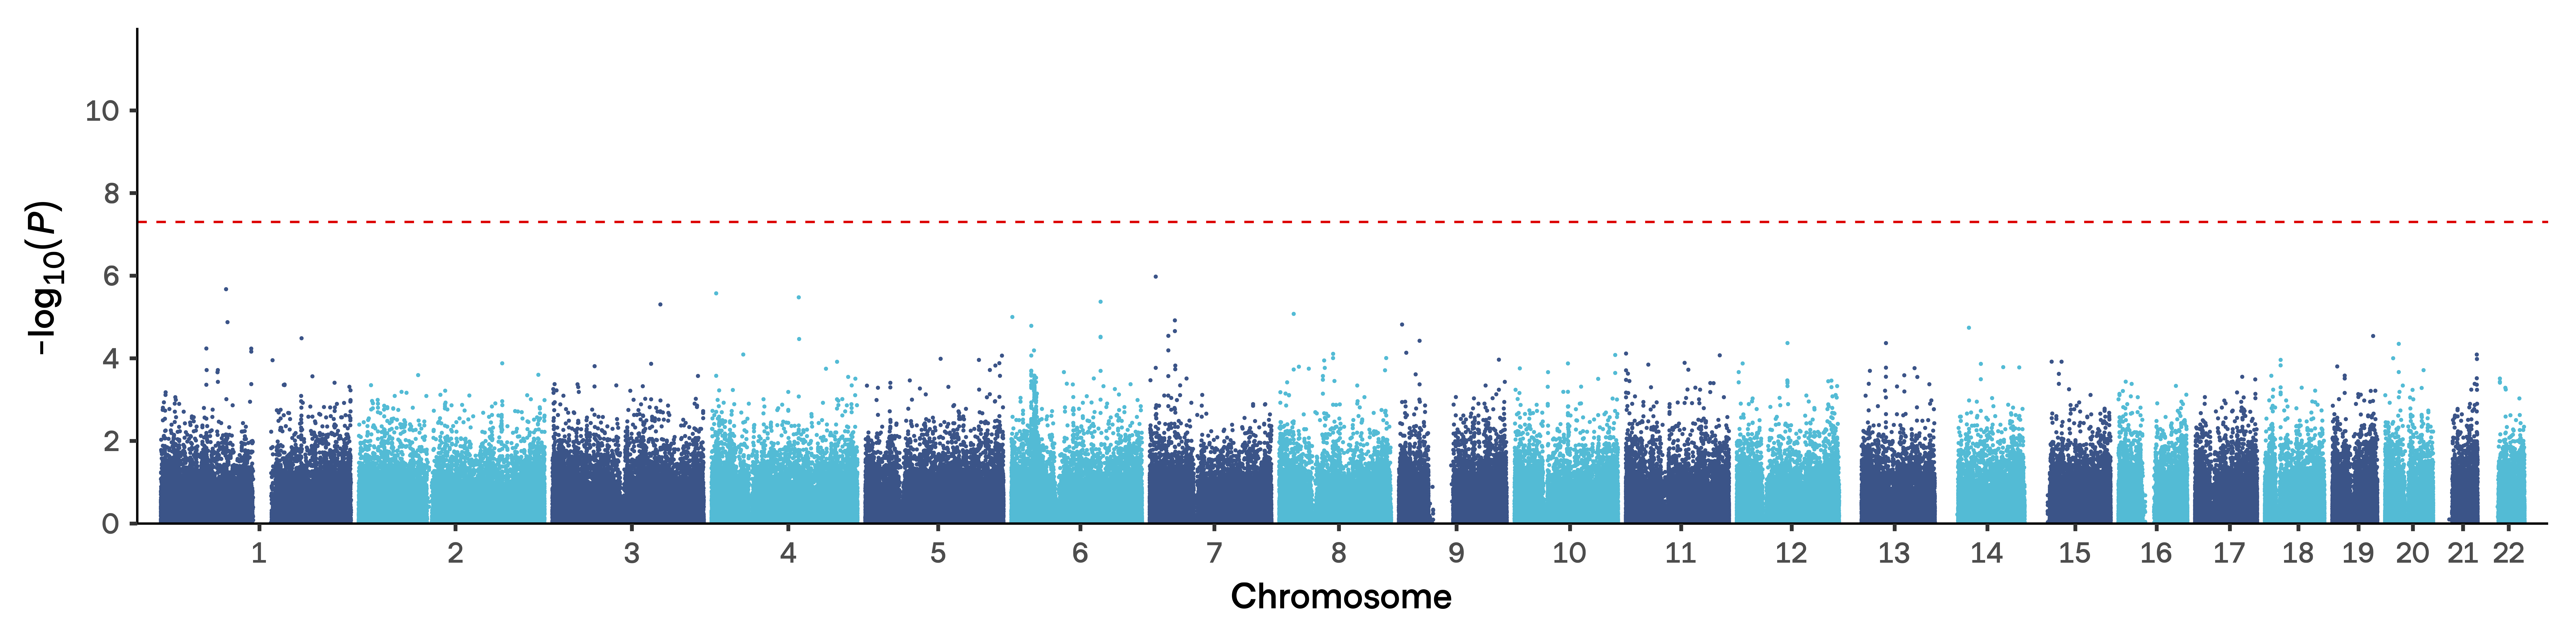

In [64]:
# running about 0.5 minutes
# Note: the alpha used here is 5e-8, but should be set as 0.05/N_genes!
options(repr.plot.width = 16,
        repr.plot.height = 4,
        repr.plot.res = 600)
source("/home/student/USER/GWAS/data/plotPlink.R")

# plot the results (.regenie is the output file from regenie)
plots= plot_qqman(
  plink_assoc_file= "./output/WES_gene_based_testing_all_v2.regenie",
  pheno_name= "CMT",
  save_plot = FALSE,
  lambda1_qq_pos = c(1.48, -5.5),
  lambda2_qq_pos = c(1.1, -4)
)
print(plots$manhattan_plot)

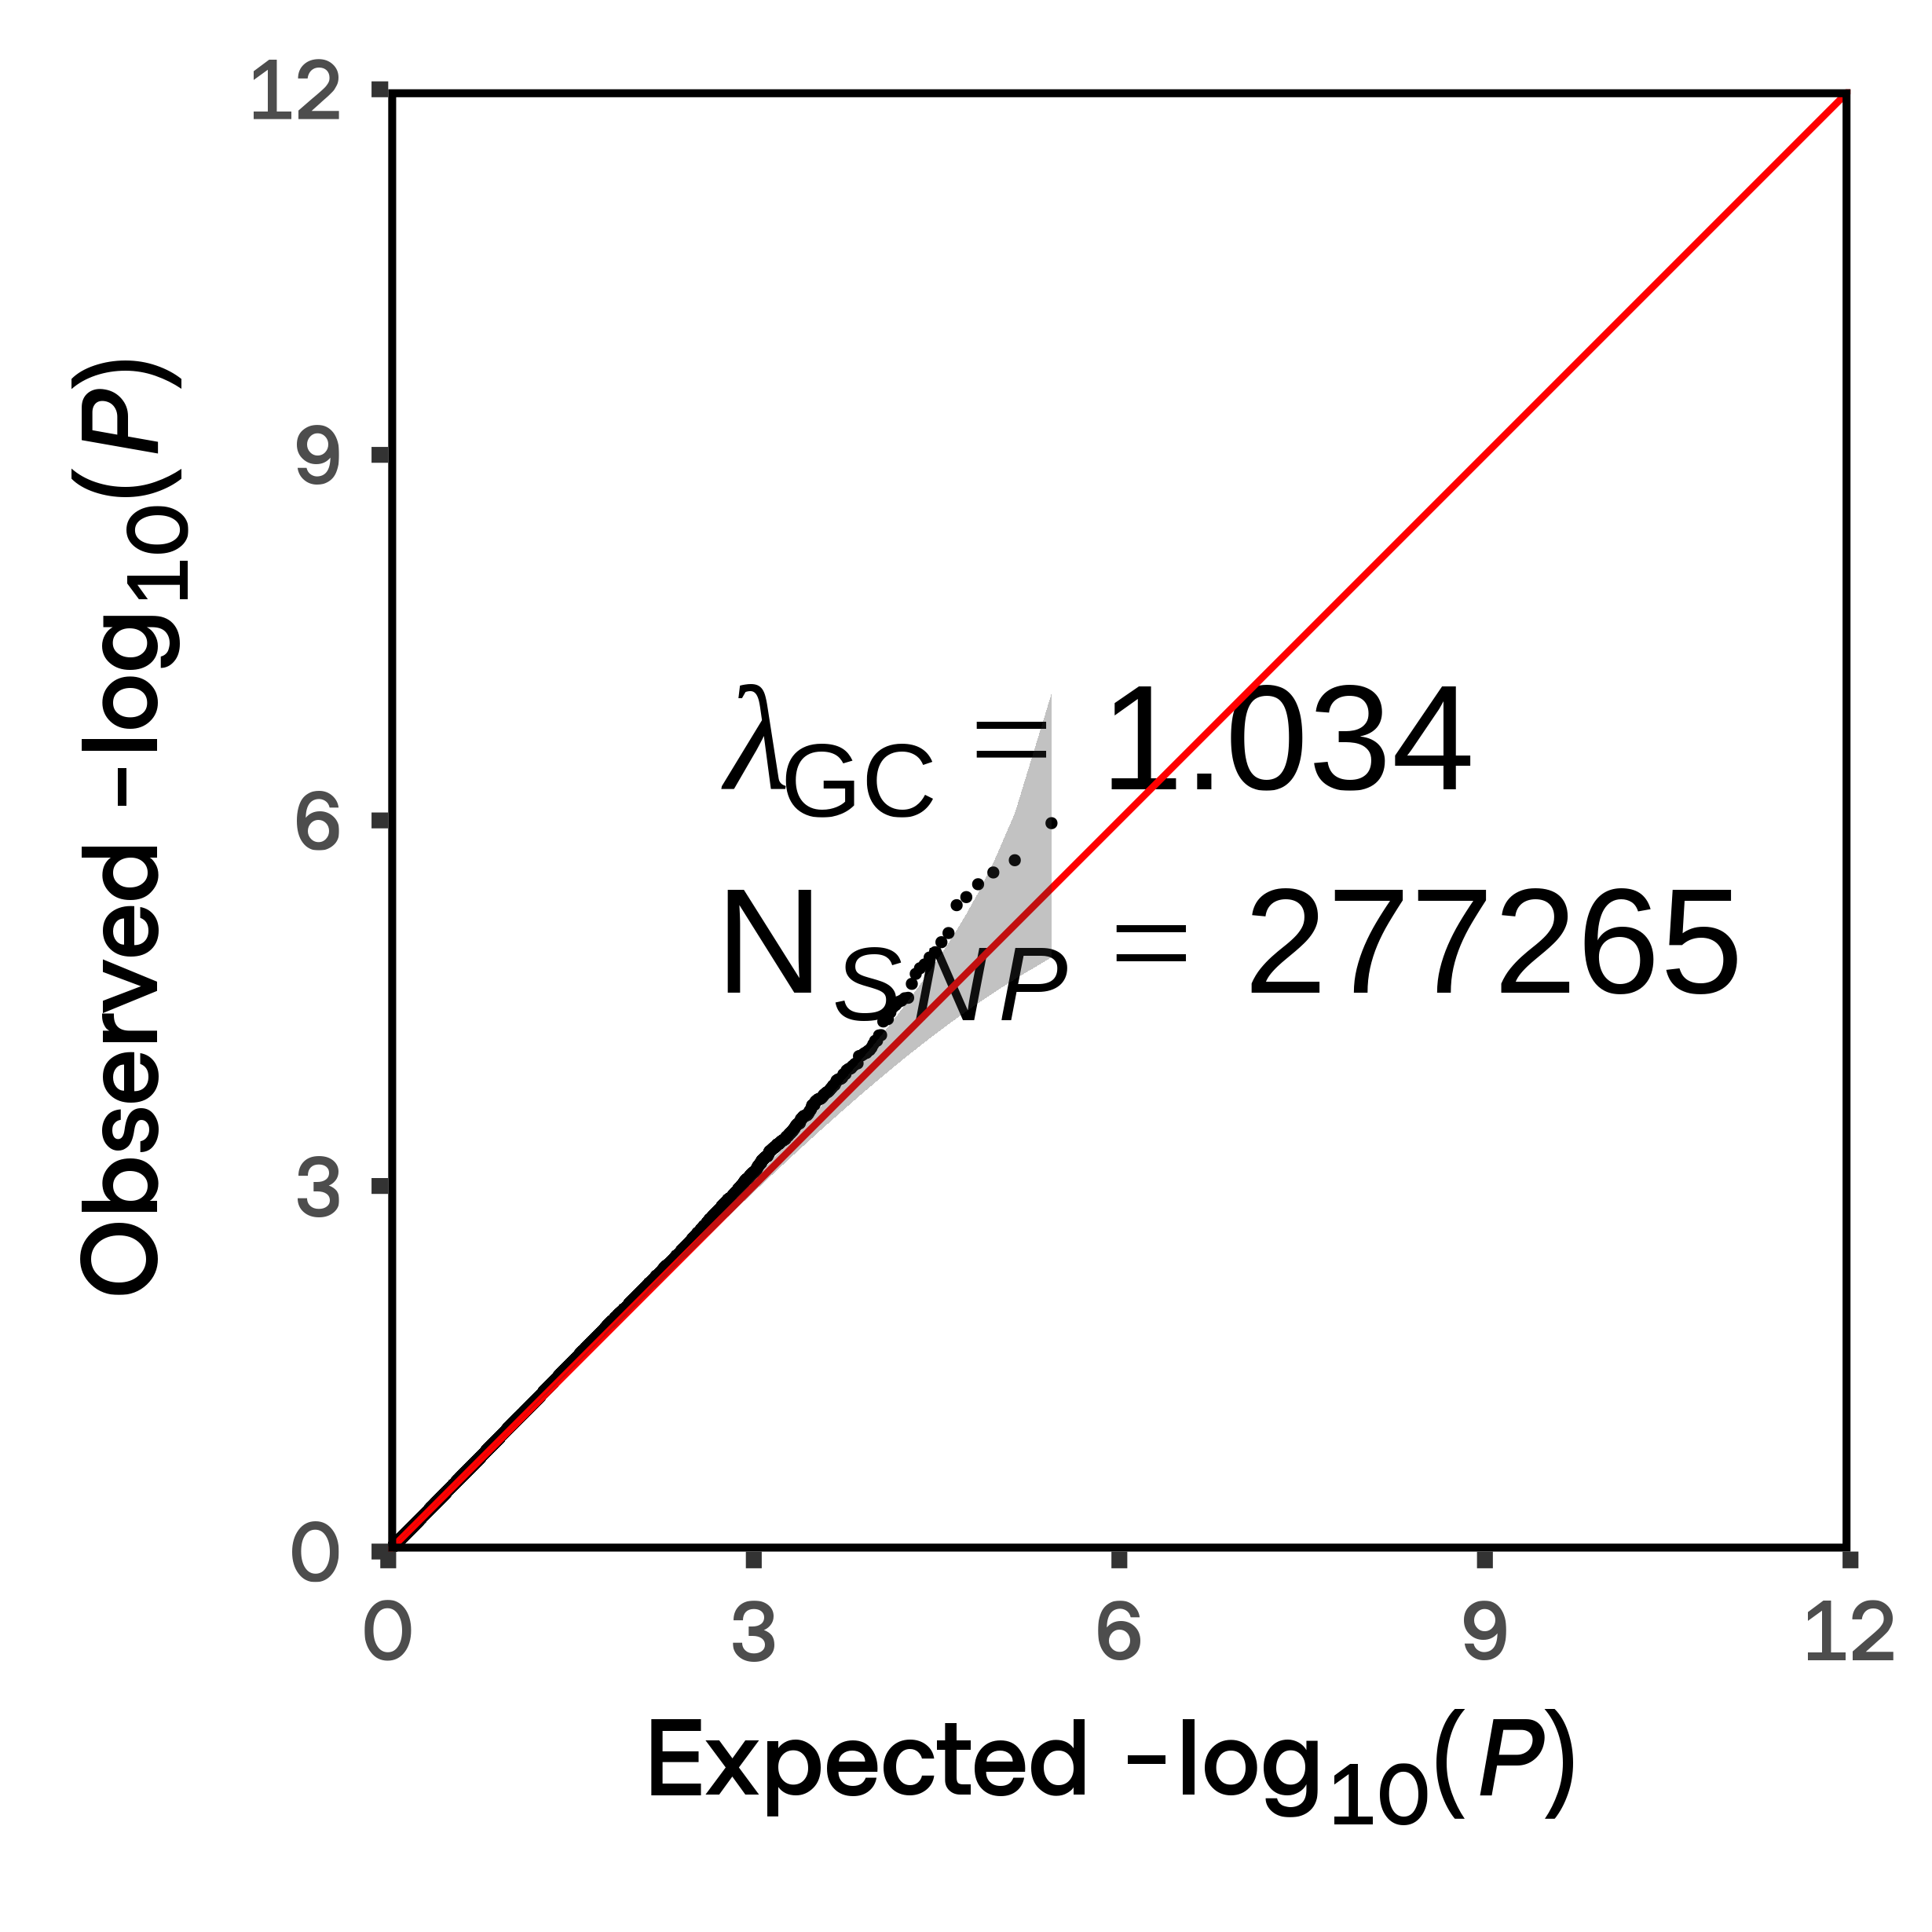

In [65]:
# running about 0.5 minutes
options(repr.plot.width = 4.1,
        repr.plot.height = 4.1,
        repr.plot.res = 600)
print(plots$qq_plot)

## Excercise F: Calculate GWAS power


Now we generate a statistical power analysis plot for GWAS studies.

Supports binary (case-control) traits over a range of odds ratios and minor allele frequencies, and quantitative traits over a range of effect sizes and minor allele frequencies.


### Part1 : Quantitative traits

In our above example, standing height is the quantitative trait.

In [78]:
# calculate the standard deviation of the quantitative trait
import pandas as pd
df = pd.read_table(
    '/home/student/USER/GWAS/data/European_1w_phenotypes.txt',
    sep = '\\s+',
    header = 0
)
print(df.shape)
df['Standing_height'].std(skipna=True)

(10000, 11)


np.float64(0.09365788681305078)

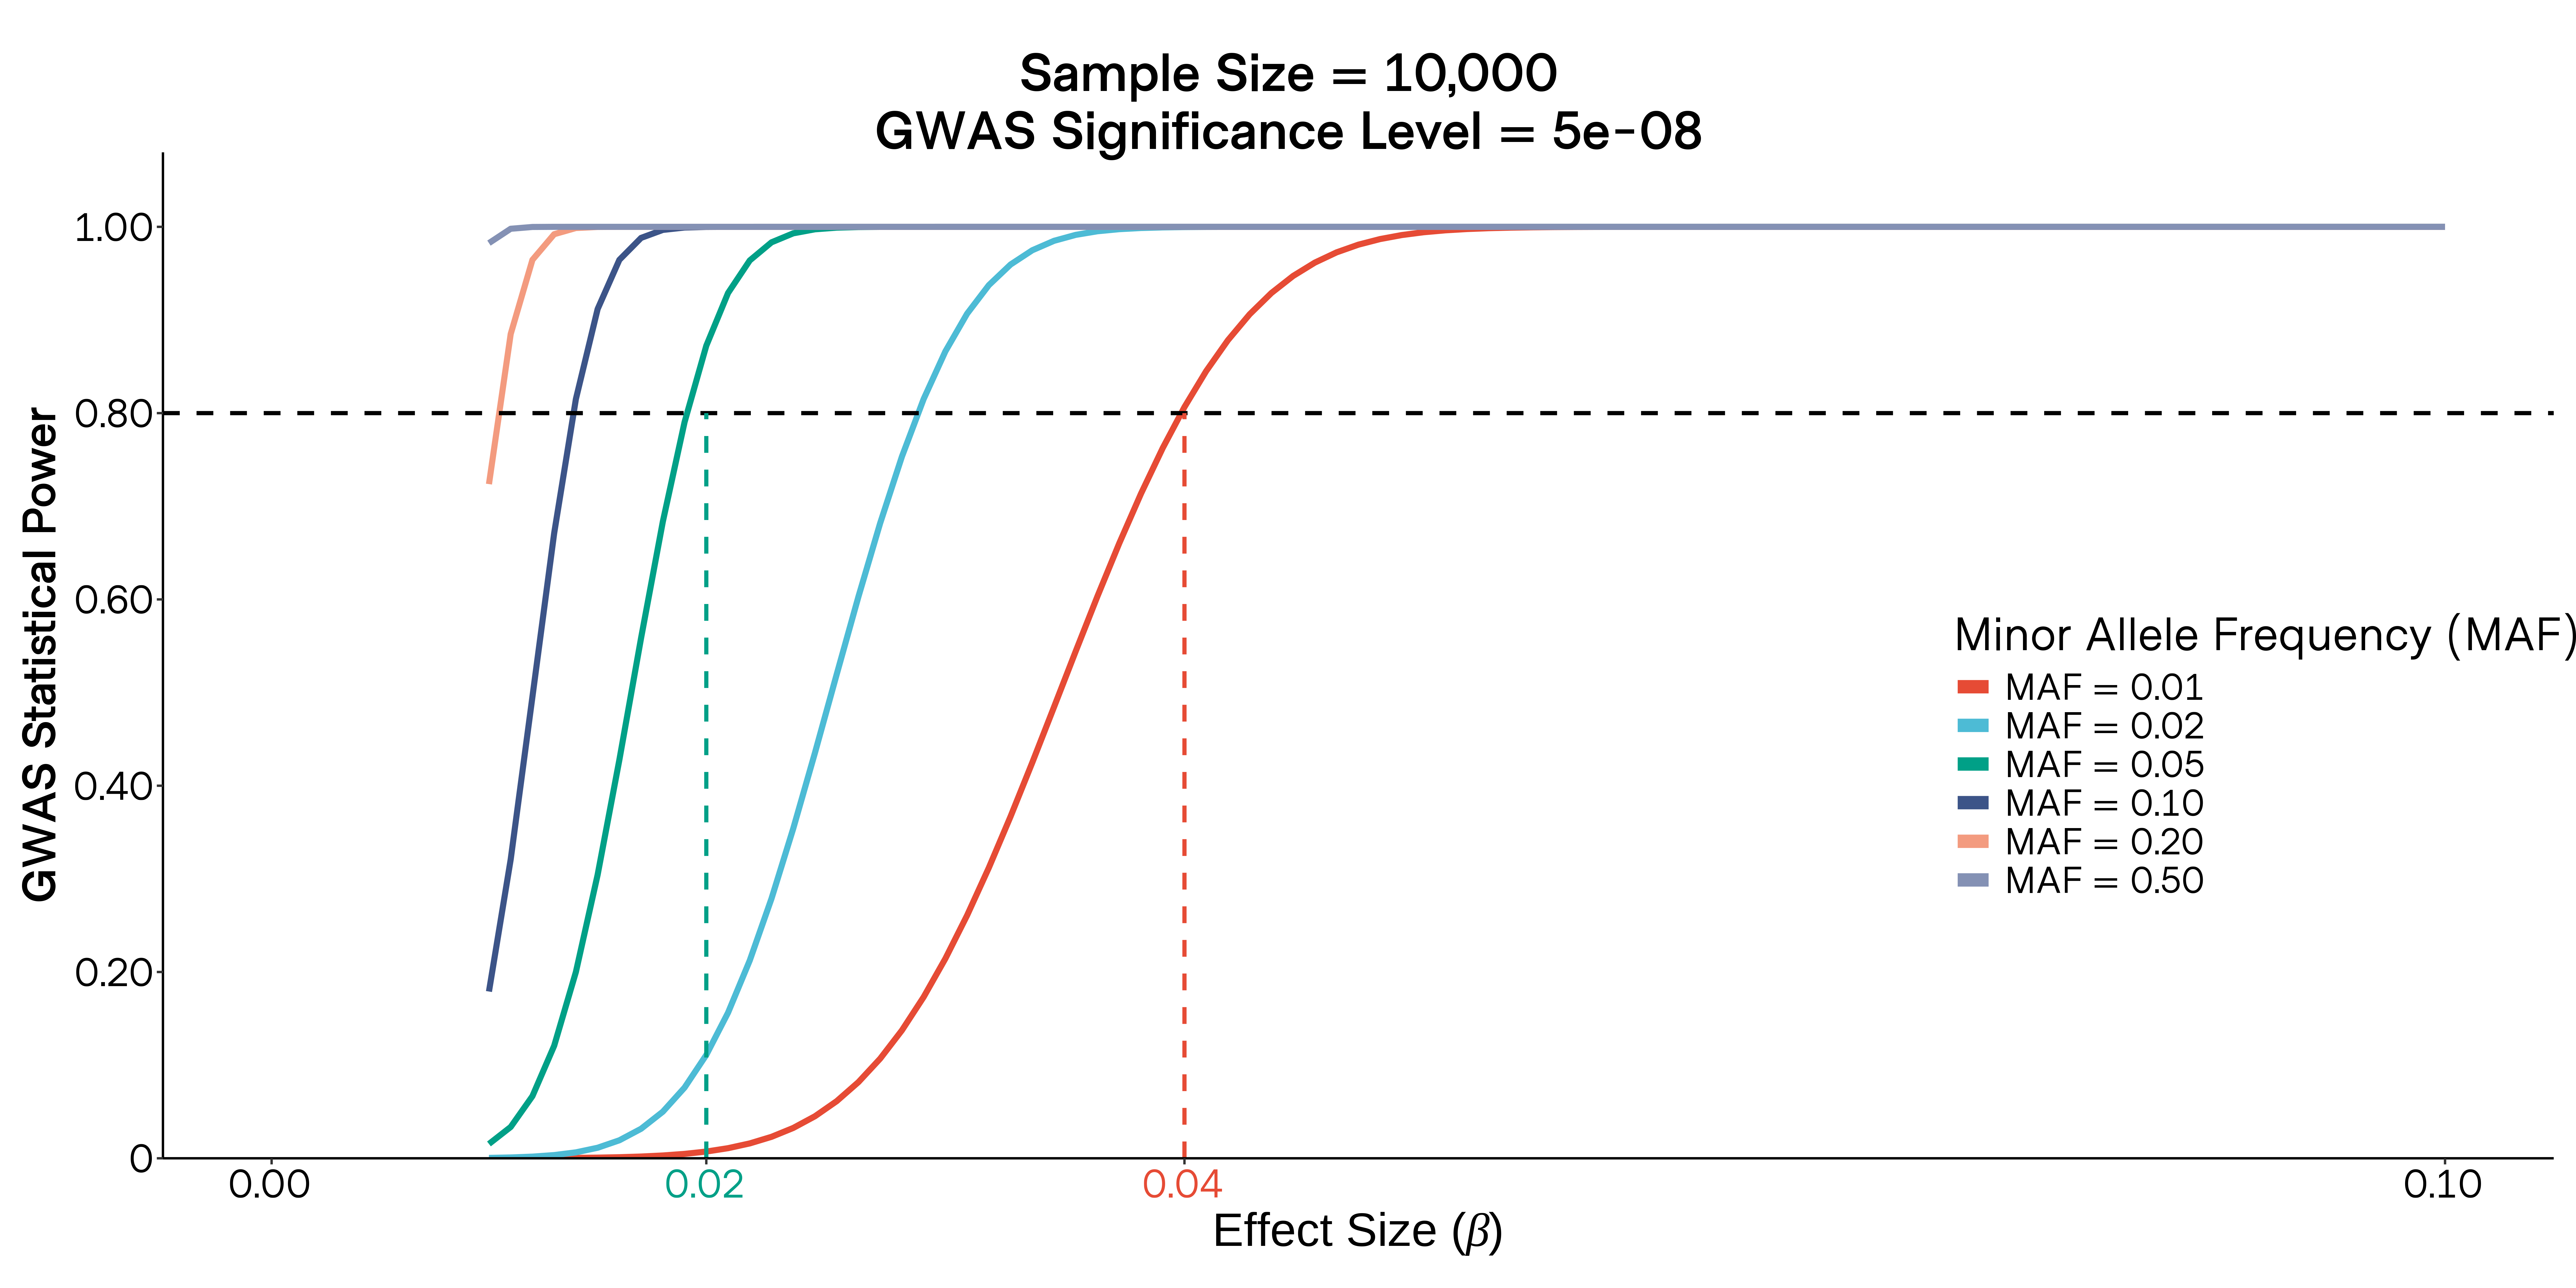

In [1]:
options(repr.plot.width = 16,
        repr.plot.height = 8,
        repr.plot.res = 600)
source("/home/student/USER/GWAS/data/plotPlink.R")
power_results_qt <- plot_gwas_power(
        trait_type = "qt",
        sd_trait = 0.09365788681305078,
        N = 10000,
        maf_levels = c(0.01, 0.02, 0.05, 0.10, 0.20, 0.50),
        effect_size = seq(0.01, 0.10, 0.001),
        save_plot = FALSE
    )
print(power_results_qt$plot)

### Part2: Binary traits

Now we generate a statistical power analysis plot for a given range of odds ratios and minor allele frequencies in a **case-control** GWAS study. 

Statistical power is crucial for designing a successful GWAS.

It helps you determine the probability of detecting a true association, given a specific sample size, allele frequency, and effect size (Odds Ratio).

### Example Usage

Let's run the example with a sample dataset:

- Cases: 4,324

- Controls: 93,945

- Odds Ratios: Ranging from 1.01 to 2.00

- MAF: 0.01, 0.02, 0.05, 0.10, 0.20, 0.50

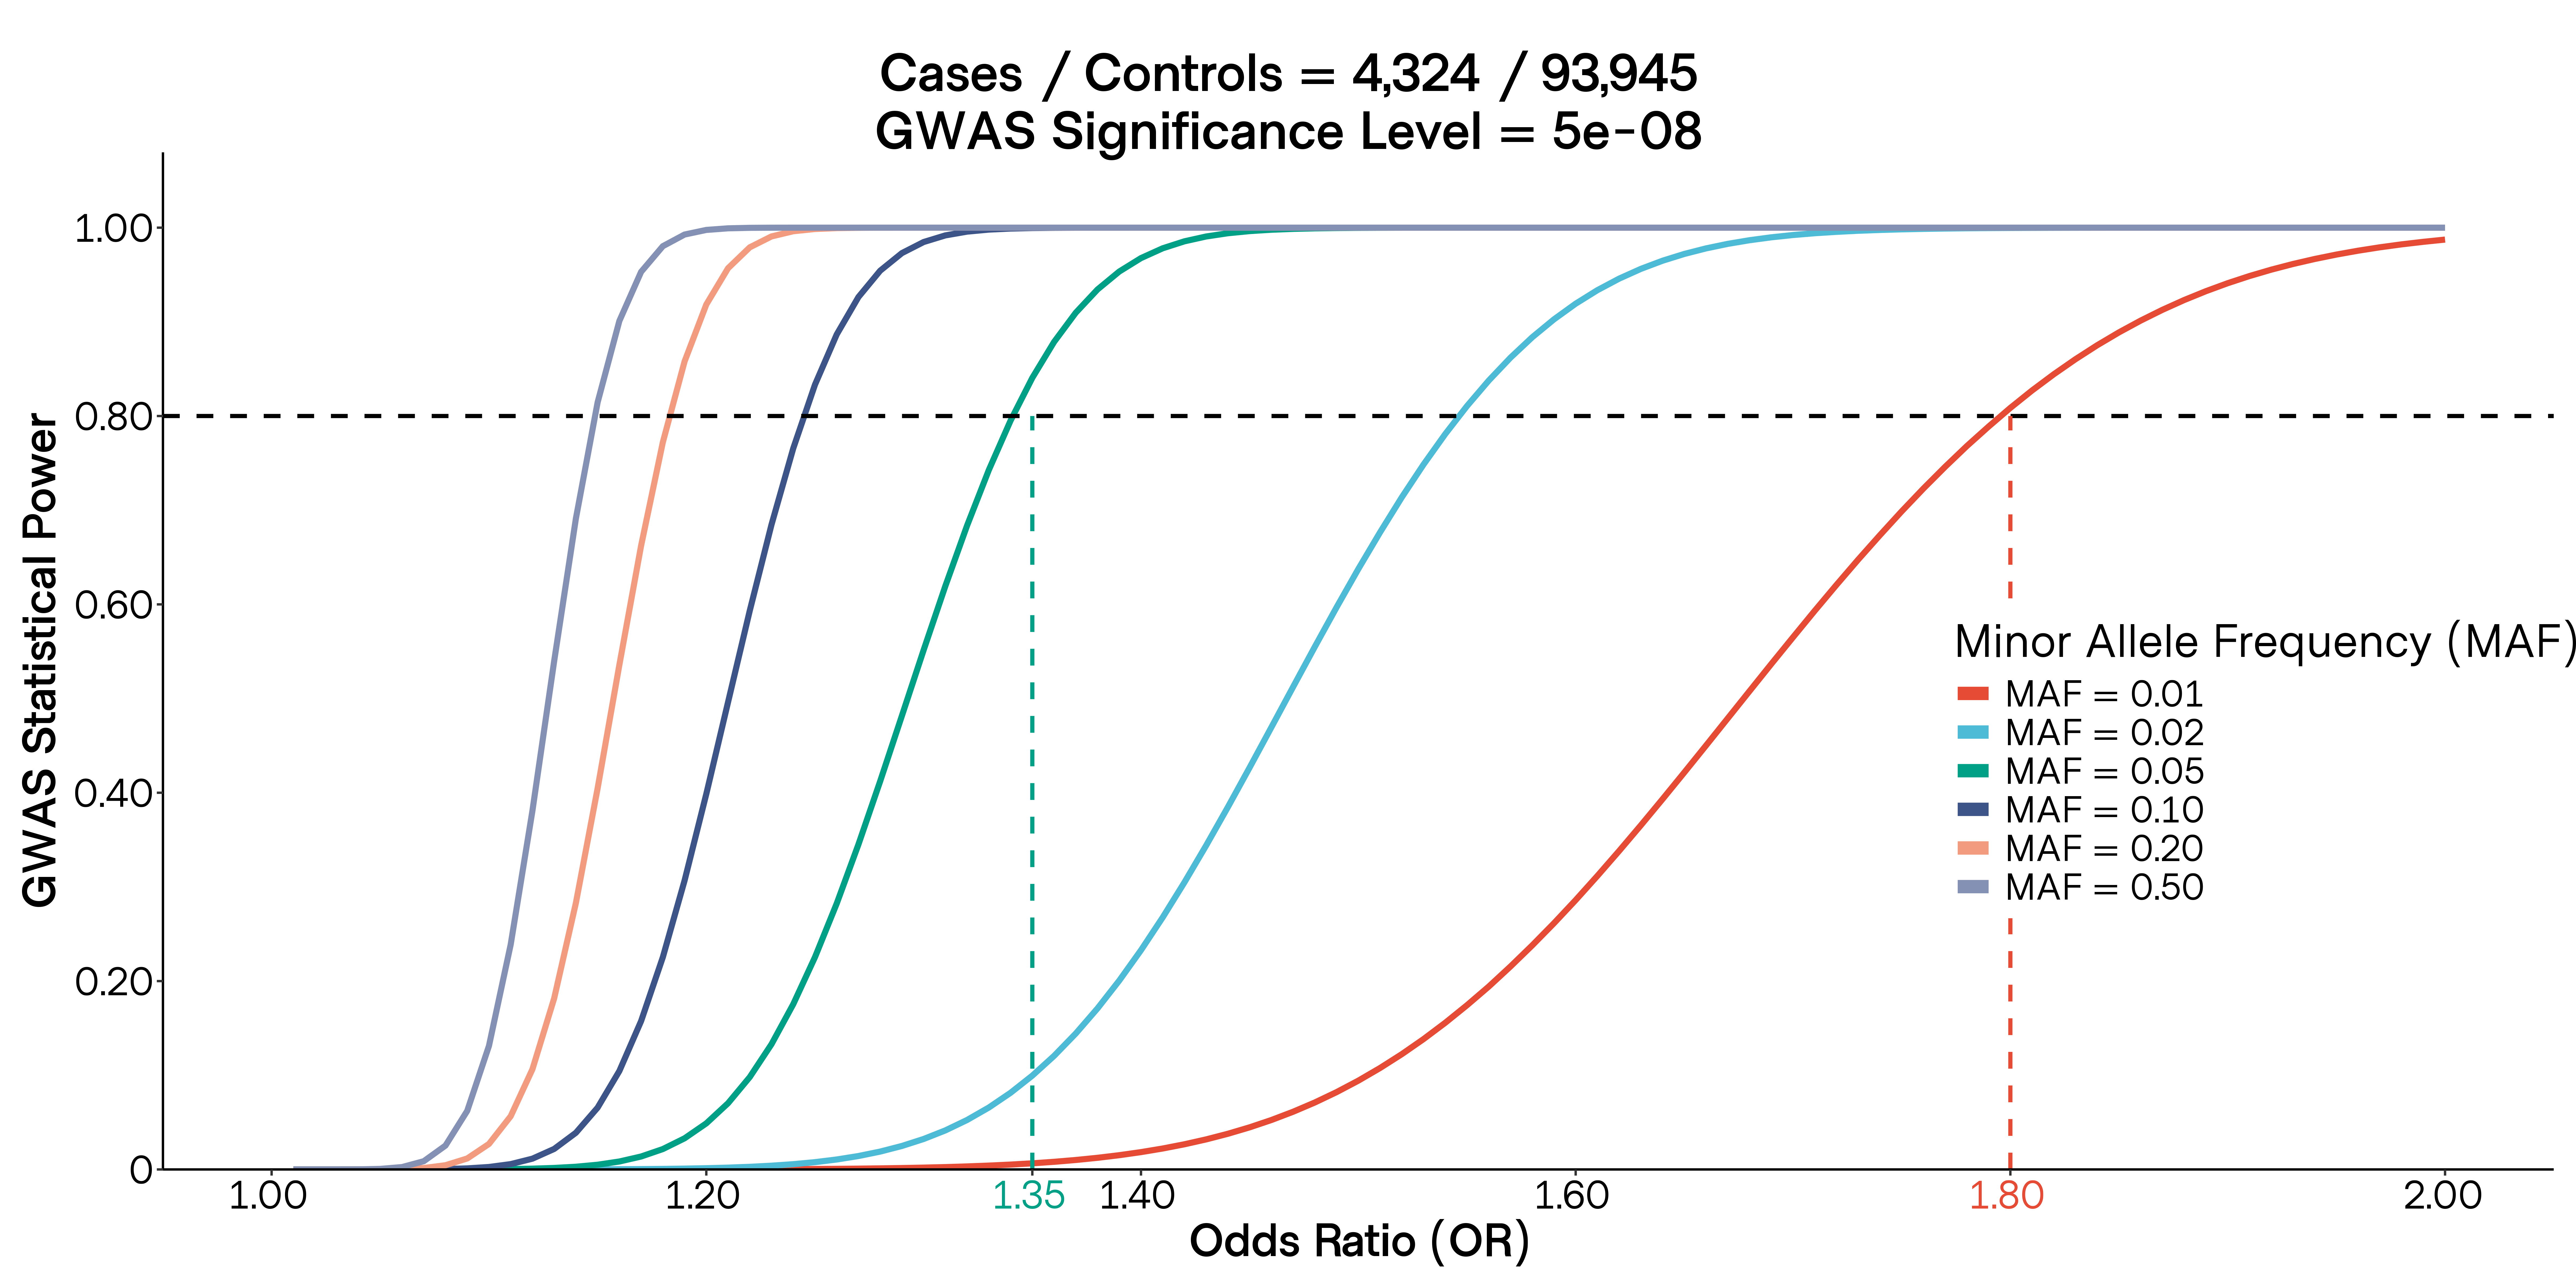

In [1]:
options(repr.plot.width = 16,
        repr.plot.height = 8,
        repr.plot.res = 600)
source("/home/student/USER/GWAS/data/plotPlink.R")

power_results <- plot_gwas_power(
        trait_type = "bt",
        n_cases = 4324,
        n_controls = 93945,
        maf_levels = c(0.01, 0.02, 0.05, 0.10, 0.20, 0.50),
        or_range = seq(1.01, 2.00, 0.01),
        save_plot = FALSE
    )
print(power_results$plot)